# Alpha Diversity Analysis

Measurement of within sample diversity.

In [1]:
import os
import pandas as pd
import numpy as np
import qiime2 as q2
from qiime2 import Visualization
from scipy.stats import shapiro, kruskal, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# location of the data and all the results produced by this notebook 
data_dir = 'project_data'


if not os.path.isdir(data_dir):
    os.makedirs(data_dir) 

# 1. Data import

In [52]:
#filtered sequence
! wget -nv -O $data_dir/rep-seqs.qza 'https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=Sequences_rep_set.qza'

# Feature Table
! wget -nv -O $data_dir/table.qza 'https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=Feature_table.qza'

# Taxonomy file generate from silva
! wget -nv -O $data_dir/taxonomy_1.qza 'https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=taxonomy_1.qza'

# Phylogeny file 
! wget -nv -O $data_dir/fasttree-tree-rooted.qza 'https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=fasttree-tree-rooted.qza'

# Metadata
! wget -nv -O $data_dir/sample_metadata.tsv 'https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=metadata-nutrition.tsv'

2022-12-11 10:15:18 URL:https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=Sequences_rep_set.qza [390624/390624] -> "project_data/rep-seqs.qza" [1]
2022-12-11 10:15:18 URL:https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=Feature_table.qza [504534/504534] -> "project_data/table.qza" [1]
2022-12-11 10:15:18 URL:https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=taxonomy_1.qza [303165/303165] -> "project_data/taxonomy_1.qza" [1]
2022-12-11 10:15:19 URL:https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=fasttree-tree-rooted.qza [249852/249852] -> "project_data/fasttree-tree-rooted.qza" [1]
2022-12-11 10:15:19 URL:https://polybox.ethz.ch/index.php/s/MBLSUQXzglnn66u/download?path=%2F&files=metadata-nutrition.tsv [300302/300302] -> "project_data/sample_metadata.tsv" [1]


### 1.1 Metadata

In [68]:
metadata_df = pd.read_csv(f'project_data/sample_metadata.tsv', sep='\t', float_precision='round_trip')
metadata_df.head()

,sampleid,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
0,10317.000046,20s,20.0,Normal,23.75,False,2016-08-25 18:30:00,USA,True,1919.3,...,Rarely,Regularly,Occasionally,Rarely,Occasionally,Occasionally,Never,Never,Daily,Daily
1,10317.000050,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
2,10317.000038,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
3,10317.000047,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
4,10317.000046,40s,45.0,Normal,23.15,False,2016-05-24 19:00:00,United Kingdom,True,68.8,...,Regularly,Never,Never,Occasionally,Never,Daily,Rarely,Occasionally,Regularly,Daily


In [61]:
type(metadata_df['sampleid'])

pandas.core.series.Series

### 1.2 Feature Table

Load feature table visulaisation produced in Sequence_import script:

In [16]:
! qiime feature-table summarize \
    --i-table $data_dir/table.qza \
    --m-sample-metadata-file $data_dir/sample_metadata.tsv \
    --o-visualization $data_dir/table.qzv

Saved Visualization to: project_data/table.qzv


In [17]:
Visualization.load(f'{data_dir}/table.qzv')

<visualization: Visualization uuid: 5f1cef9c-6e8a-48b6-97ad-128749c6508f>

### 1.3 Pre created phylogenetic tree

Load created phylogenetic tree (rooted fasttree) made in workbook E_Phylogeny for our dataset. We need a pre-created phylogenetic tree for our dataset as some diversity metrics in our further analysis need to know the relatedness between sequences.

### here load the tree we make from E_Phylogeny!

In [13]:
! qiime empress tree-plot \
    --i-tree project_data/fasttree-tree-rooted.qza \
    --o-visualization $data_dir/fasttree-tree-rooted.qzv

Saved Visualization to: project_data/fasttree-tree-rooted.qzv


In [14]:
Visualization.load(f'{data_dir}/fasttree-tree-rooted.qzv')

<visualization: Visualization uuid: 3bb942ab-7e81-485c-bc77-08ef8181c09d>

# 2. Alpha rarefaction

To decide the threshold for rarefying interactive alpha rarefaction curves are produced with the alpha-rarefaction action.

In [15]:
! qiime diversity alpha-rarefaction \
    --i-table $data_dir/table.qza \
    --i-phylogeny project_data/fasttree-tree-rooted.qza \
    --p-max-depth 20000 \
    --m-metadata-file project_data/sample_metadata.tsv \
    --o-visualization $data_dir/alpha-rarefaction.qzv

Saved Visualization to: project_data/alpha-rarefaction.qzv


In [4]:
Visualization.load(f'{data_dir}/alpha-rarefaction.qzv')

<visualization: Visualization uuid: 502ac71c-564b-44d7-95e8-42571168fab0>

The top plot in the visulaization shows the alpha diversity over different sequencing depth in our data. When the curve reaches a plateau, higher sequencing depth would not result in a different estimated sample diversity metric.
The bottom plot visualizes the remaining sample count, when the feature table is rarefied to the specific sample depth shown on the x-axis.
The goal is to select a sequencing depth for rarefaction at which sample loss is minimized while alpha diversity is maximized. This serves as rarefying threshold in the folowing step. To define the rarefying threshold it was looked at the shannon index metric and the sample metadata columns: age category, host common name, race and sex.

Sample depth 2500 was chosen as at this depth the Shannon index reaches the plateau for all relevant categories in alpha diversity while not too many samples are lost. By investigating feature table, 21.01% features in 96.75% of the samples are kept in total at the sequencing depth of 2500, by looking at the host common name. The investigated categories lose equivalent amount of samplese.g. 5 samples from male and 12 samples from females are lost and the losses of the different age categories lies in the span of less than 10 samples per category.

# 3. Diversity Analysis

Now the various diversity metrics at choosen rarefaction depth are outputted with the core-metrics-phylogenetic function. This function rarefies the feature table and at the same time calculated diversity metrics for it.

In [19]:
! qiime diversity core-metrics-phylogenetic \
  --i-table $data_dir/table.qza \
  --i-phylogeny $data_dir/fasttree-tree-rooted.qza \
  --m-metadata-file project_data/sample_metadata.tsv \
  --p-sampling-depth 2500 \
  --output-dir $data_dir/core-metrics-results1

Saved FeatureTable[Frequency] to: project_data/core-metrics-results1/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: project_data/core-metrics-results1/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: project_data/core-metrics-results1/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: project_data/core-metrics-results1/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: project_data/core-metrics-results1/evenness_vector.qza
Saved DistanceMatrix to: project_data/core-metrics-results1/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: project_data/core-metrics-results1/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: project_data/core-metrics-results1/jaccard_distance_matrix.qza
Saved DistanceMatrix to: project_data/core-metrics-results1/bray_curtis_distance_matrix.qza
Saved PCoAResults to: project_data/core-metrics-results1/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: project_data/core-metrics-results1/weighted_u

## 3.1 Alpha diversity

### 3.1.1 Faith_pd

We start by investigating the faith_pd vector. The Faith_pd metric meassures the phylogenetic diversity and take into account the branch lenght of the phylogeny.

### Association with categorical valiables

To test for significant differenced of alpha diversity we run the Kruskal-Wallis test to check which categorial variables form the metadata are strongly associated with the within sample diversity. (With the  `qiime diversity alpha-group-significance` function)
We choose the Kruskal-Wallis test as it is a non-parametric measure and thus more robuts to outliers compared to other correlation metrics.

In [18]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance.qzv

Saved Visualization to: project_data/core-metrics-results/faith-pd-group-significance.qzv


In [3]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance.qzv')

<visualization: Visualization uuid: 8a8139ec-9e7b-4eab-993d-e7c432848430>

As per definition "the null hypothesis is that the medians of all groups are equal, and the alternative hypothesis is that at least one population median of one group is different from the population median of at least one other group. A significant Kruskal–Wallis test indicates that at least one sample stochastically dominates one other sample." (Wikipedia). As the columns geolocation, last travel, level of education, alcohol consumption!, alcohol frequency, red and white wine consumption!, drinks per session, homecooked meal frequency, (milk cheese frequency), olive oil!, prepared meal frequency, salted snack frequency, seafood frequency, vegetable frequency have a significant p-value(below 0.05), they are all associated with differences in microbial community richness.

### Association with numerical valiables

To make an additional test for significant differenced of alpha diversity we run the Spearman correlation test to check which numerical valiebles form the metadata are strongly associated with the within sample diversity. (with the `qiime diversity alpha-correlation` function)

In [20]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance-numeric.qzv

Saved Visualization to: project_data/core-metrics-results/faith-pd-group-significance-numeric.qzv


In [70]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance-numeric.qzv')

<visualization: Visualization uuid: 4b1c59ce-fc26-4785-bc0a-28cbce870659>

In [27]:
metadata_df.describe()

,sampleid,GEN_age_corrected,GEN_bmi_corrected,GEN_elevation,GEN_height_cm,GEN_latitude,GEN_longitude,GEN_weight_kg
count,523.000000,492.000000,508.000000,488.000000,517.000000,488.000000,488.000000,518.000000
mean,10317.000047,47.483740,24.124213,155.914754,174.615087,44.828689,-47.063320,69.685328
std,0.000009,15.798816,4.894094,327.503281,98.850353,9.959122,54.179516,19.566368
min,10317.000003,3.000000,11.200000,-0.900000,15.000000,-43.000000,-157.800000,3.000000
25%,10317.000043,37.000000,20.800000,25.200000,162.000000,38.900000,-101.100000,58.000000
50%,10317.000050,49.000000,23.505000,60.100000,170.000000,49.500000,-3.600000,69.000000
75%,10317.000052,59.000000,26.545000,127.425000,178.000000,51.600000,-0.600000,81.000000
max,10317.000062,81.000000,49.190000,2864.300000,1800.000000,57.500000,153.000000,175.000000


From the Spearman correlation test it is observable that the categories GEN_age_corrected, GEN_elevation, GEN_height, GEN_latitude and GEN_longitude obtain significnat p-values (<0.05). This would suggest that these categories are associated with differences in microbial community richness. However, as for the categories GEN_elevation, GEN_height, GEN_latitude and GEN_longitude there are some outliers in the dataset resulting in also a large standart deviation. Thus, these observation has to be taken with caution. So arguably only GEN_age_corrected and GEN_latitude are significantly correlated with differences in microbial community richness.

## Alternative metrics to check for association with categorical valiables

### 3.1.2 Shannon

Shannon does not operate on phylogenetic differences. It takes into account the species richness and abundance.

In [4]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/shannon_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/shannon_vector-group-significance.qzv

Saved Visualization to: project_data/core-metrics-results/shannon_vector-group-significance.qzv


In [37]:
Visualization.load(f'{data_dir}/core-metrics-results/shannon_vector-group-significance.qzv')

<visualization: Visualization uuid: b669cfbb-0da8-4467-bd5f-43819449714c>

NUT_alcohol_consumption, NUT_alcohol_frequency, 'NUT_alcohol_types_red_wine, NUT_alcohol_types_unspecified, NUT_meat_eggs_frequency, NUT_seafood_frequency, NUT_vegetable_frequency showed significant influence on differences in alpha diversity.

### 3.1.3 Eveness

Evenness among species measures the relative abundances of species within a community. The Shannon Index is a quantitative metrics of species diversity, which combines both species richness and species evenness to derive a value that characterizes a community.

In [6]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/evenness_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/evenness_vector-group-significance.qzv

Saved Visualization to: project_data/core-metrics-results/evenness_vector-group-significance.qzv


In [7]:
Visualization.load(f'{data_dir}/core-metrics-results/evenness_vector-group-significance.qzv')

<visualization: Visualization uuid: d5bc35f2-9a2d-4e5e-b5d6-6b45ef54034c>

NUT_alcohol_types_beercider, NUT_lowgrain_diet_type, NUT_meat_eggs_frequency, NUT_seafood_frequency showed significant influence on differences in alpha diversity.

## ANOVA test

Instead of running one-way Kruskal Wallis tests, an ANOVA test can also be used to compare alpha diversity values between groups, provided that the other assumptions of ANOVA are correct (such as normal distribution; alpha diversity values often are, but it depends).

### Check for normality of the datadistribution

As you can see on the plot above, the majority of values are focused around 0, with only some values being different. To get a more quantitative view of all the ASVs, we can additionally perform a statistical test for data normality. We will use _scipy_'s [implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) of the [Shapiro-Wilk test for normality](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test). 

In [97]:
data = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
data.head()

10317.000002929     9.082301
10317.000002930    12.824856
10317.000003283     6.647969
10317.000004079     9.144990
10317.000016169     7.251614
Name: faith_pd, dtype: float64

In [98]:
alpha = 0.05
results = {}

stat, p = shapiro(data)
results['Faith_pd'] = p
# convert test results into a DataFrame
results_df = pd.DataFrame(data=results.values(), index=results.keys(), columns=['p'])

# add a new column with a descriptive test result
results_df['is_normal'] = results_df['p'] > alpha
results_df

,p,is_normal
Faith_pd,0.000012,False


Since the faith_pd values are not normaliy distributed, an ANOVA test can not be made due to ANOVA's normlaity assumption for data.

# Visulaizations

In [99]:
a = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
b = pd.read_csv(os.path.join(data_dir, 'sample_metadata.tsv'), sep='\t', index_col=0)['NUT_alcohol_consumption']


In [100]:
div = pd.concat([a, b], axis=1)
div

,faith_pd,NUT_alcohol_consumption
10317.000002929,NaN,True
10317.00000293,NaN,True
10317.000003283,NaN,True
10317.000004079,NaN,False
10317.000016169,NaN,True
...,...,...
10317.000062084,2.136541,NaN
10317.000062085,9.541852,NaN
10317.000062086,6.354463,NaN
10317.000062087,11.428803,NaN


In [101]:
a.index[50] in b.index

False

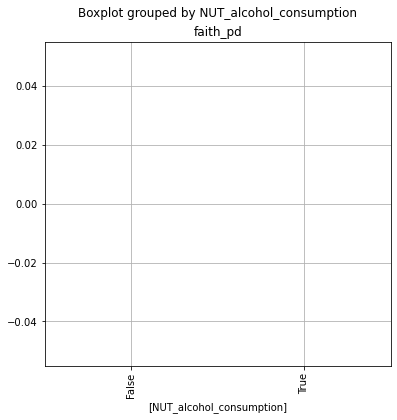

In [102]:
boxes = div.boxplot(by='NUT_alcohol_consumption', rot=90, figsize=(6,6))

### NUT_alcohol_frequency

In [71]:
NUT_alcohol_frequency = pd.read_csv(os.path.join(data_dir, 'kruskal-wallis-pairwise-NUT_alcohol_frequency.csv'), sep=',')

In [34]:
dd = NUT_alcohol_frequency[['Group 1', 'Group 2', 'p-value']]
dd_pivot = dd.pivot('Group 1', 'Group 2', 'p-value')


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


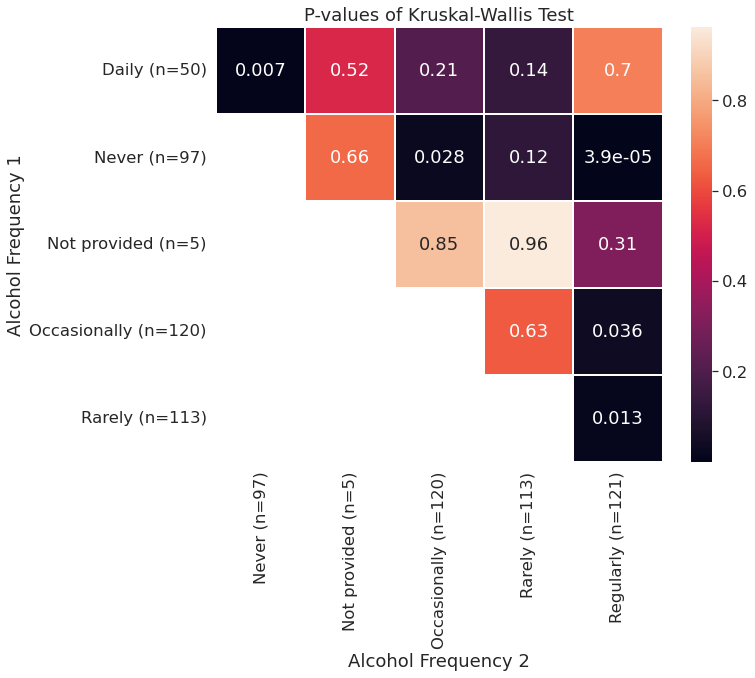

In [35]:
sns.set(rc={'figure.figsize':(10, 8), 'font.family': ['Helvetica']}, style='white')
with sns.plotting_context("notebook", font_scale=1.5):
    # seaborn's heatmap
    ax = sns.heatmap( dd_pivot, linewidth = 1.5 , annot = True)
    
    # matplotlib's customization
    ax.set_xlabel('Alcohol Frequency 2')
    ax.set_ylabel('Alcohol Frequency 1')
    ax.set_title("P-values of Kruskal-Wallis Test")
    


In [76]:
test = pd.read_csv(f'project_data/faith_pd.tsv', sep='\t', index_col=0)

In [79]:
test.columns.tolist()

['GEN_age_cat',
 'GEN_bmi_cat',
 'GEN_cat',
 'GEN_collection_timestamp',
 'GEN_country',
 'GEN_dog',
 'GEN_geo_loc_name',
 'GEN_last_move',
 'GEN_last_travel',
 'GEN_level_of_education',
 'GEN_race',
 'GEN_sex',
 'NUT_alcohol_consumption',
 'NUT_alcohol_frequency',
 'NUT_alcohol_types_beercider',
 'NUT_alcohol_types_red_wine',
 'NUT_alcohol_types_sour_beers',
 'NUT_alcohol_types_spiritshard_alcohol',
 'NUT_alcohol_types_unspecified',
 'NUT_alcohol_types_white_wine',
 'NUT_artificial_sweeteners',
 'NUT_diet_type',
 'NUT_drinks_per_session',
 'NUT_fed_as_infant',
 'NUT_fermented_plant_frequency',
 'NUT_frozen_dessert_frequency',
 'NUT_fruit_frequency',
 'NUT_gluten',
 'NUT_high_fat_red_meat_frequency',
 'NUT_homecooked_meals_frequency',
 'NUT_lowgrain_diet_type',
 'NUT_meat_eggs_frequency',
 'NUT_milk_cheese_frequency',
 'NUT_milk_substitute_frequency',
 'NUT_olive_oil',
 'NUT_poultry_frequency',
 'NUT_prepared_meals_frequency',
 'NUT_probiotic_frequency',
 'NUT_red_meat_frequency',
 'NU

In [85]:
dd = test[['NUT_alcohol_frequency','faith_pd']]

In [98]:
dd[2]

KeyError: 2

### Boxplot

In [31]:
faith_pd = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results1/faith_pd_vector.qza')).view(pd.Series)
NUT_alcohol_frequency = pd.read_csv(f'project_data/sample_metadata.tsv', sep='\t', index_col=0)['NUT_alcohol_frequency']

In [37]:
joined_table=pd.concat([faith_pd,NUT_alcohol_frequency],join='outer',axis=1)
#joined_table.dropna()

### seaborn boxplot

In [72]:
NUT_alcohol_frequency = pd.read_csv(os.path.join(data_dir, 'kruskal-wallis-pairwise-NUT_alcohol_frequency.csv'), sep=',')
dd1 = NUT_alcohol_frequency[['Group 1','p-value']]
dd2 = NUT_alcohol_frequency[['Group 2','p-value']]
dd2 = dd2.rename(columns={'Group 2': 'Group 1'})

dd_new = pd.concat([dd1, dd2])

,Group 1,p-value
0,Daily (n=50),0.007050
1,Daily (n=50),0.519514
2,Daily (n=50),0.208199
3,Daily (n=50),0.135318
4,Daily (n=50),0.703696
5,Never (n=97),0.658693
6,Never (n=97),0.027755
7,Never (n=97),0.120034
8,Never (n=97),0.000039
9,Not provided (n=5),0.850107


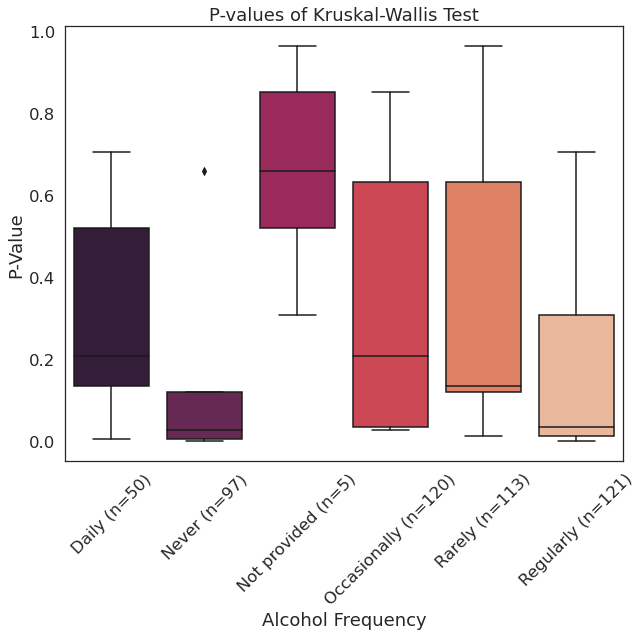

In [73]:
sns.set(rc={'figure.figsize':(10, 8), 'font.family': ['Helvetica']}, style='white')
sns.set_palette("rocket")

with sns.plotting_context("notebook", font_scale=1.5):
    # seaborn's heatmap
    ax = sns.boxplot( data = dd_new, x='Group 1', y='p-value')
    
    # matplotlib's customization
    ax.set_xlabel('Alcohol Frequency')
    ax.set_ylabel('P-Value')
    ax.set_title("P-values of Kruskal-Wallis Test")
    ax.tick_params(axis='x', rotation=45)
    
    
    
plt.savefig('P-values-alpha-alc-freq.png', bbox_inches="tight")

In [5]:
Kruskal = pd.read_csv(os.path.join(data_dir, 'Kruskal-wallis-pairwise.tsv'), sep='\t')
Kruskal = Kruskal.tail(-1)

In [8]:
dd1 = Kruskal[['NUT_alcohol_consumption','faith_pd']]
dd1['faith_pd'] = pd.to_numeric(dd1['faith_pd'])

/tmp/ipykernel_67/901833082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd1['faith_pd'] = pd.to_numeric(dd1['faith_pd'])


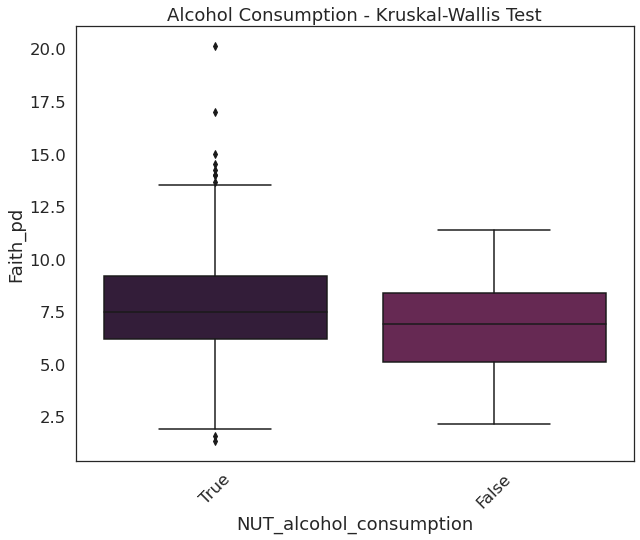

In [23]:
sns.set(rc={'figure.figsize':(10, 8), 'font.family': ['Helvetica']}, style='white')
sns.set_palette("rocket")

with sns.plotting_context("notebook", font_scale=1.5):
    # seaborn's heatmap
    ax = sns.boxplot(data = dd1, x='NUT_alcohol_consumption', y='faith_pd')
    
    # matplotlib's customization
    #ax.set_xlabel('Alcohol Consumption')
    ax.set_ylabel('Faith_pd')
    ax.set_title("Alcohol Consumption - Kruskal-Wallis Test")
    ax.tick_params(axis='x', rotation=45)
    
    
    
plt.savefig('figures/KW-alc-con.png', bbox_inches="tight")

In [19]:
dd2 = Kruskal[['NUT_alcohol_frequency','faith_pd']]
dd2['faith_pd'] = pd.to_numeric(dd1['faith_pd'])
#dd2['NUT_alcohol_frequency'] = dd2.NUT_alcohol_frequency.astype('category')

/tmp/ipykernel_67/1320793123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd2['faith_pd'] = pd.to_numeric(dd1['faith_pd'])


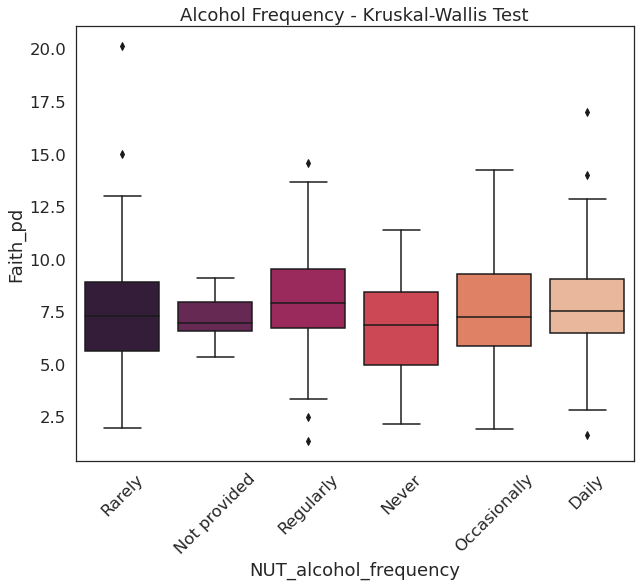

In [24]:
sns.set(rc={'figure.figsize':(10, 8), 'font.family': ['Helvetica']}, style='white')
sns.set_palette("rocket")

with sns.plotting_context("notebook", font_scale=1.5):
    # seaborn's heatmap
    ax = sns.boxplot(data = dd2, x='NUT_alcohol_frequency', y='faith_pd')
    
    # matplotlib's customization
    #ax.set_xlabel('Alcohol Consumption')
    ax.set_ylabel('Faith_pd')
    ax.set_title("Alcohol Frequency - Kruskal-Wallis Test")
    ax.tick_params(axis='x', rotation=45)
    
    
    
plt.savefig('figures/KW-alc-freq.png', bbox_inches="tight")

# NUT_milk_cheese_frequency

In [25]:
dd3 = Kruskal[['NUT_milk_cheese_frequency','faith_pd']]
dd3['faith_pd'] = pd.to_numeric(dd1['faith_pd'])#dd2['NUT_alcohol_frequency'] = dd2.NUT_alcohol_frequency.astype('category')

/tmp/ipykernel_67/1426389817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd3['faith_pd'] = pd.to_numeric(dd1['faith_pd'])#dd2['NUT_alcohol_frequency'] = dd2.NUT_alcohol_frequency.astype('category')


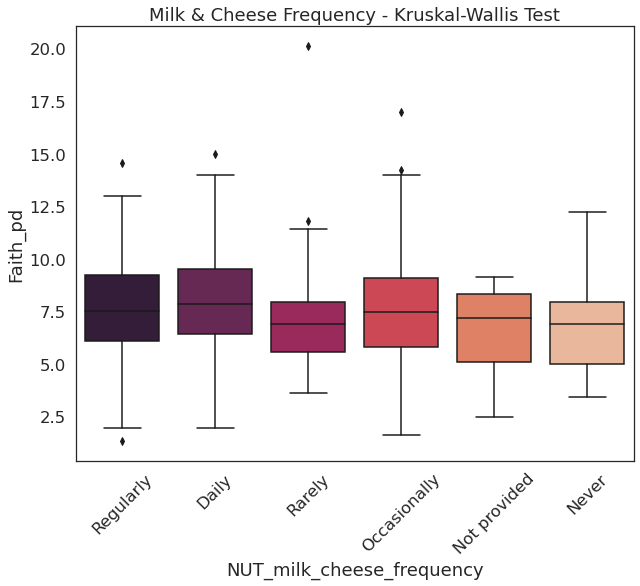

In [27]:
sns.set(rc={'figure.figsize':(10, 8), 'font.family': ['Helvetica']}, style='white')
sns.set_palette("rocket")

with sns.plotting_context("notebook", font_scale=1.5):
    # seaborn's heatmap
    ax = sns.boxplot(data = dd3, x='NUT_milk_cheese_frequency', y='faith_pd')
    
    # matplotlib's customization
    #ax.set_xlabel('Alcohol Consumption')
    ax.set_ylabel('Faith_pd')
    ax.set_title("Milk & Cheese Frequency - Kruskal-Wallis Test")
    ax.tick_params(axis='x', rotation=45)
    
    
    
plt.savefig('figures/KW-milk-cheese.png', bbox_inches="tight")

# NUT_olive_oil

In [28]:
dd4 = Kruskal[['NUT_olive_oil','faith_pd']]
dd4['faith_pd'] = pd.to_numeric(dd1['faith_pd'])


/tmp/ipykernel_67/503418718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd4['faith_pd'] = pd.to_numeric(dd1['faith_pd'])


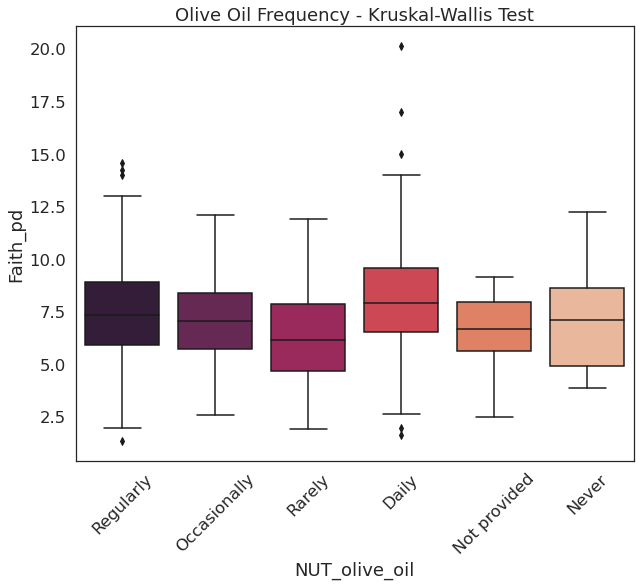

In [30]:
sns.set(rc={'figure.figsize':(10, 8), 'font.family': ['Helvetica']}, style='white')
sns.set_palette("rocket")

with sns.plotting_context("notebook", font_scale=1.5):
    # seaborn's heatmap
    ax = sns.boxplot(data = dd4, x='NUT_olive_oil', y='faith_pd')
    
    # matplotlib's customization
    #ax.set_xlabel('Alcohol Consumption')
    ax.set_ylabel('Faith_pd')
    ax.set_title("Olive Oil Frequency - Kruskal-Wallis Test")
    ax.tick_params(axis='x', rotation=45)
    
    
    
plt.savefig('figures/KW-olive-oil.png', bbox_inches="tight")

# NUT_seafood_frequency

In [31]:
dd6 = Kruskal[['NUT_seafood_frequency','faith_pd']]
dd6['faith_pd'] = pd.to_numeric(dd1['faith_pd'])


/tmp/ipykernel_67/2941569905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd6['faith_pd'] = pd.to_numeric(dd1['faith_pd'])


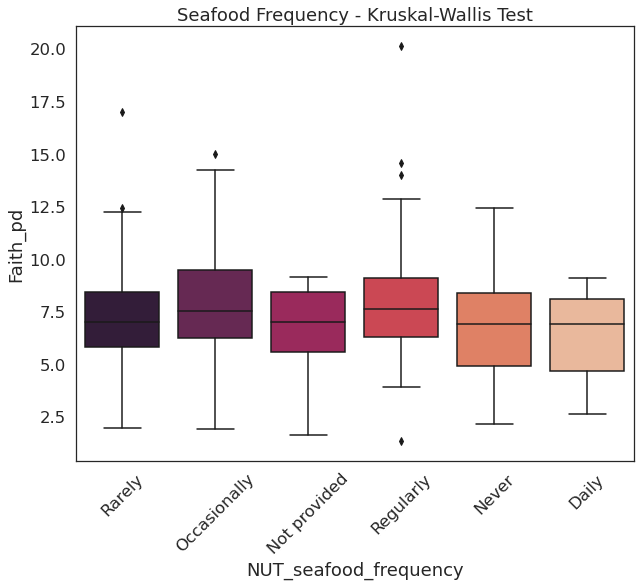

In [32]:
sns.set(rc={'figure.figsize':(10, 8), 'font.family': ['Helvetica']}, style='white')
sns.set_palette("rocket")

with sns.plotting_context("notebook", font_scale=1.5):
    # seaborn's heatmap
    ax = sns.boxplot(data = dd6, x='NUT_seafood_frequency', y='faith_pd')
    
    # matplotlib's customization
    #ax.set_xlabel('Alcohol Consumption')
    ax.set_ylabel('Faith_pd')
    ax.set_title("Seafood Frequency - Kruskal-Wallis Test")
    ax.tick_params(axis='x', rotation=45)
    
    
    
plt.savefig('figures/KW-seafood.png', bbox_inches="tight")

# NUT_vegetable_frequency

In [33]:
dd7 = Kruskal[['NUT_vegetable_frequency','faith_pd']]
dd7['faith_pd'] = pd.to_numeric(dd1['faith_pd'])


/tmp/ipykernel_67/3046416609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd7['faith_pd'] = pd.to_numeric(dd1['faith_pd'])


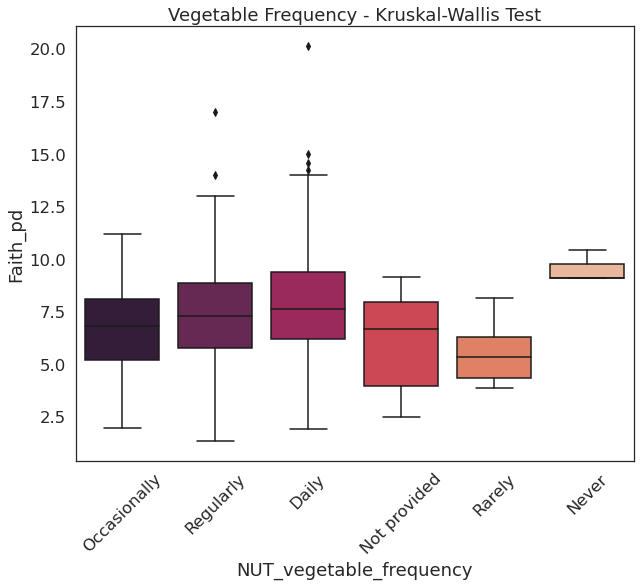

In [34]:
sns.set(rc={'figure.figsize':(10, 8), 'font.family': ['Helvetica']}, style='white')
sns.set_palette("rocket")

with sns.plotting_context("notebook", font_scale=1.5):
    # seaborn's heatmap
    ax = sns.boxplot(data = dd7, x='NUT_vegetable_frequency', y='faith_pd')
    
    # matplotlib's customization
    #ax.set_xlabel('Alcohol Consumption')
    ax.set_ylabel('Faith_pd')
    ax.set_title("Vegetable Frequency - Kruskal-Wallis Test")
    ax.tick_params(axis='x', rotation=45)
    
    
    
plt.savefig('figures/KW-vegetable.png', bbox_inches="tight")

# NUT_meat_eggs_frequency

In [38]:
Kruskal_shannon = pd.read_csv(os.path.join(data_dir, 'Alpha-shannon-values.tsv'), sep='\t')
Kruskal_shannon = Kruskal_shannon.tail(-1)
Kruskal_shannon

,id,GEN_age_cat,GEN_bmi_cat,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_geo_loc_name,GEN_last_move,GEN_last_travel,...,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency,shannon_entropy
1,10317.000046093,20s,Normal,False,2016-08-25 18:30:00,USA,True,USA:CO,I have lived in my current state of residence ...,1 year,...,Regularly,Occasionally,Rarely,Occasionally,Occasionally,Never,Never,Daily,Daily,2.1026100266318
2,10317.000050156,Not provided,Overweight,False,2016-07-06 09:00:00,United Kingdom,False,United Kingdom:England,I have lived in my current state of residence ...,1 year,...,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally,5.04927288028999
3,10317.000037960,30s,Overweight,False,2016-06-29 09:30:00,United Kingdom,False,United Kingdom:England,I have lived in my current state of residence ...,Month,...,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally,5.20417763563586
4,10317.000047201,50s,Normal,False,2016-07-12 17:30:00,Germany,False,Germany:HH,I have lived in my current state of residence ...,1 year,...,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly,4.57755930303509
5,10317.000046346,40s,Normal,False,2016-05-24 19:00:00,United Kingdom,True,United Kingdom:Unspecified,I have lived in my current state of residence ...,6 months,...,Never,Never,Occasionally,Never,Daily,Rarely,Occasionally,Regularly,Daily,5.06028157198039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,10317.000050184,60s,Normal,False,2016-07-26 09:00:00,United Kingdom,False,United Kingdom:England,I have lived in my current state of residence ...,6 months,...,Regularly,Not provided,Occasionally,Rarely,Daily,Never,Daily,Regularly,Never,6.03845614074345
503,10317.000046121,20s,Normal,True,2016-05-17 18:45:00,Canada,True,Canada:Unspecified,I have lived in my current state of residence ...,Month,...,Never,Rarely,Never,Occasionally,Daily,Never,Never,Occasionally,Occasionally,6.17189449736047
504,10317.000053419,60s,Normal,False,2016-08-02 20:00:00,United Kingdom,False,United Kingdom:England,Not provided,1 year,...,Occasionally,Rarely,Occasionally,Rarely,Daily,Never,Never,Occasionally,Occasionally,4.84303235426663
505,10317.000053417,40s,Normal,False,2016-07-24 07:15:00,United Kingdom,False,United Kingdom:England,I have lived in my current state of residence ...,I have not been outside of my country of resid...,...,Rarely,Never,Daily,Never,Daily,Never,Never,Daily,Never,3.68105052403924


In [41]:
dd8 = Kruskal_shannon[['NUT_meat_eggs_frequency','shannon_entropy']]
dd8['shannon_entropy'] = pd.to_numeric(dd8['shannon_entropy'])


/tmp/ipykernel_67/2105335374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd8['shannon_entropy'] = pd.to_numeric(dd8['shannon_entropy'])


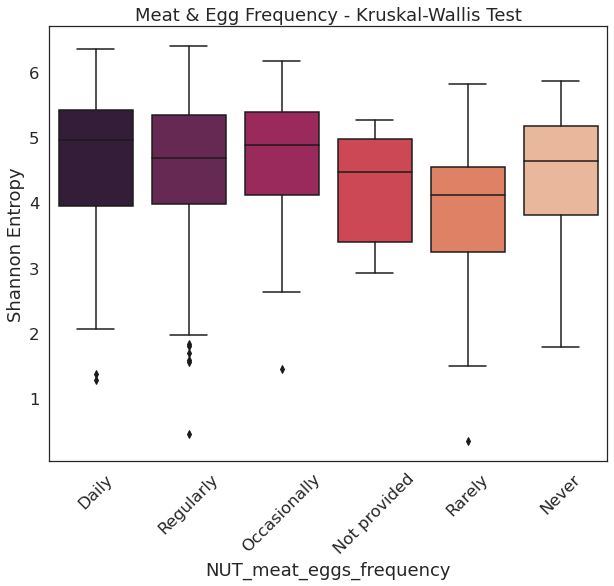

In [42]:
sns.set(rc={'figure.figsize':(10, 8), 'font.family': ['Helvetica']}, style='white')
sns.set_palette("rocket")

with sns.plotting_context("notebook", font_scale=1.5):
    # seaborn's heatmap
    ax = sns.boxplot(data = dd8, x='NUT_meat_eggs_frequency', y='shannon_entropy')
    
    # matplotlib's customization
    #ax.set_xlabel('Alcohol Consumption')
    ax.set_ylabel('Shannon Entropy')
    ax.set_title("Meat & Egg Frequency - Kruskal-Wallis Test")
    ax.tick_params(axis='x', rotation=45)
    
    
    
plt.savefig('figures/KW-meat-egg.png', bbox_inches="tight")